# Part II - Influences of Loan features on Estimated Returns and Borrower APRs
## by Emmanuel Obeng


## Investigation Overview
> In this investigation, I seek to understand key features/variables that affect the expected returns on loans and the borrower APR. I would also seek to explore the relationship between these features. 


## Dataset Overview

>The dataset used contains 113,937 loans from Prosper Funding LLC with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

> The dataset is one of Udacity's curated databases and was obtained from this [link](https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv.)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan_df = pd.read_csv("prosperLoanData.csv")

In [3]:
#function for distribution plots

def distributionplot(dataframe, xlabels, ylabels, barcolor, bins, titles):
    #plot size
    plt.figure(figsize = [10, 5])
    
    #describe/create the titles of the plot and style
    sns.distplot(dataframe, kde = False, bins = bins, color=barcolor)
    plt.xlabel(xlabels);
    plt.ylabel(ylabels);
    plt.title(titles);
    plt.legend();

In [4]:
#function for bar plots
def barplot(dataframe, x, xlabels, ylabels, palette, titles):
    #plot size
    plt.figure(figsize = [10, 5])
    
    #describe/create the titles of the plot and style
    sns.countplot(data = dataframe, x = x, palette = palette)
    plt.xlabel(xlabels)
    plt.ylabel(ylabels)
    plt.title(titles);

In [5]:
#function for scatter plots
def scatterplot(dataframe, x, y, xlabels, ylabels, alpha, color, titles):
    #plot size
    plt.figure(figsize = [10, 5])
    
    #describe/create the titles of the plot and style
    plt.scatter(data = dataframe, x =x, y = y, alpha = alpha, color=color);
    plt.xlabel(xlabels)
    plt.ylabel(ylabels)
    plt.title(titles);
    
    correlation = loan_df[x].corr(loan_df[y])
    
    print("The correlation between " + xlabels + " and " + ylabels + " is " + str(correlation))

In [6]:
# Convert IncomeRange to ordered categorical data type
var_dict = {'IncomeRange': ['$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999', '$1-24,999','$0'],
             }

for var in var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = var_dict[var])
    loan_df[var] = loan_df[var].astype(ordered_var)

## Estimated Returns
The distribution of the Estimated Returns skewed to the right with the highest peak around 12%. From the distribution, we notice that most Loans are estimated to make returns between 4% to a little above 15%

In [7]:
# drop rows with empty Estimated Return cells
loan_df = loan_df[loan_df['EstimatedReturn'].notnull()]

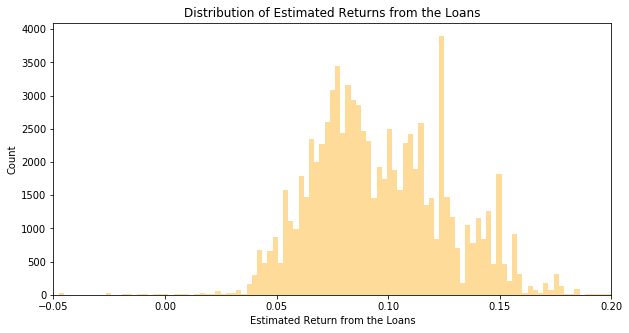

In [8]:
#plot the distribution of the Estimated Returns
distributionplot (loan_df.EstimatedReturn, 'Estimated Return from the Loans', 'Count', 'Orange', 200, 'Distribution of Estimated Returns from the Loans')
plt.xlim(-.05, 0.2);

## Borrower Annual Percentage Rate (APR)
The distribution of the Borrower APR is mutimodal with the highest peak around 35%. There are also lesser peaks around 13%, 17%, 22% and 30%.

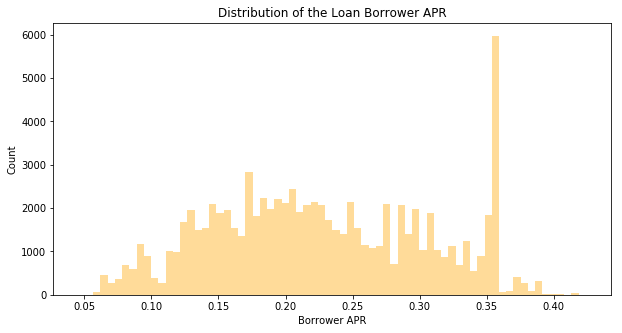

In [9]:
#plot the distribution of the BorrowerAPR
distributionplot (loan_df.BorrowerAPR, 'Borrower APR', 'Count', 'Orange', 70, 'Distribution of the Loan Borrower APR')

## Loan Term
Loans were given out on a three-term basis, a 12 month, 36 month and 60 month terms respectively. Most loans were taken on a 36 month basis with close to 60,000 loans taken on this repayment term. The next loan term many loans were taken by was a 60 month term with about 25,000 loans taken on this term. Finally, the least term by which loans were borrowed was a 12 month term. There were roughly a 1,000 loans taken on a 12 month repayment term

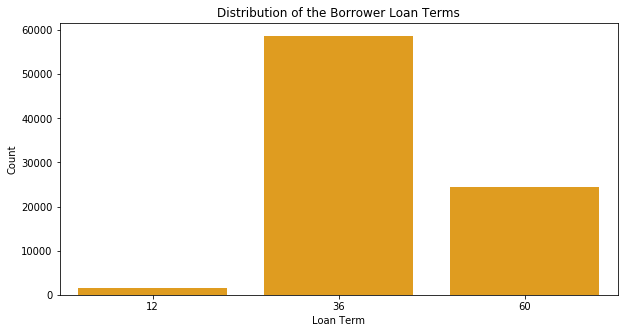

In [10]:
# plot the distribution of the Loan Term 
fig = plt.figure(figsize=(10,5))
sns.countplot(x='Term', data=loan_df, color='Orange')
plt.title('Distribution of the Borrower Loan Terms')
plt.xlabel('Loan Term')
plt.ylabel('Count')
plt.show()

## Credit Ratings
We notice that the credit ratings are skewed towards the right. This will imply that more loans were given to borrowers with relatively bad credit ratings.

In [11]:
# the lower grades, NC and HR which are present in the original credit rating but not the new prosper rating will be replaced by the least grade in the Prosper rating, E to ensure consistency
loan_df['CreditGrade'].replace(['NC', 'HR'], 'E', inplace = True)

# fill NA with empty strings
loan_df['ProsperRating (Alpha)'].fillna("", inplace = True)
loan_df['CreditGrade'].fillna("", inplace = True)

# merge both ratings
loan_df['UpdatedProsperRating'] = loan_df['ProsperRating (Alpha)'] + loan_df['CreditGrade']

In [12]:
# convert the UpdatedProsperRating into ordered categorical types
categorical_rating = ['AA', 'A', 'B', 'C', 'D', 'E']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = categorical_rating)
loan_df['UpdatedProsperRating'] = loan_df['UpdatedProsperRating'].astype(ordered_var)

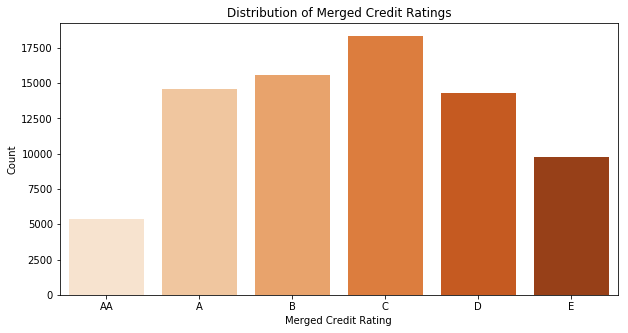

In [13]:
# ploting a bar chart of credit ratings
barplot(loan_df, 'UpdatedProsperRating', 'Merged Credit Rating', 'Count', 'Oranges', 'Distribution of Merged Credit Ratings');

## Income Range

Similar number of loans were given out to borrowers within the 100,000+ and 75,000-99,000 bracket and also the 50,000-74,999 and 25,000-49,999. Most of the loans were given out to middle ranges (50,000-74,999 and 25,000-49,999) in what seems to look like a normal distribution.

In [14]:
# for the purpose of this graph, categories that could not be provided will be replaced with $0 income range
loan_df['IncomeRange'].replace(['Not employed', 'Not displayed'], '$0', inplace = True)

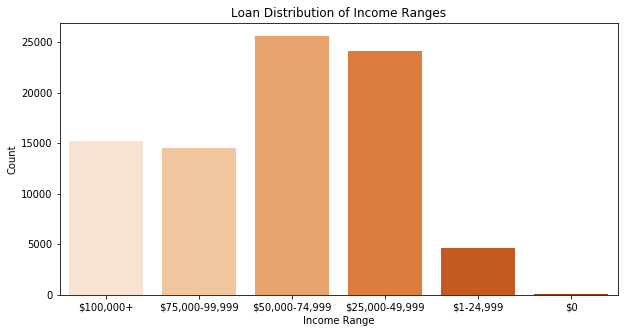

In [15]:
# ploting a bar chart of income ranges
barplot(loan_df, 'IncomeRange', 'Income Range', 'Count', 'Oranges', 'Loan Distribution of Income Ranges');

## Borrower APR against Estimated Returns on Loans
With a strong positive correlation of 0.8, the higher the Borrower APR, the more likely Prosper Loans LLC was expected to make returns on Loans given to Borrowers.

The correlation between Borrower APR and Estimated Return is 0.794275198295


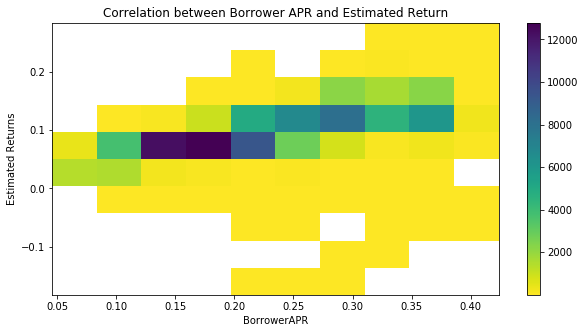

In [16]:
#plot the relation between Borrower APR and Estimated Returns
plt.figure(figsize = [10, 5])
plt.hist2d(data = loan_df,  x ='BorrowerAPR' , y = 'EstimatedReturn', cmin=0.5, cmap='viridis_r');
plt.colorbar()
plt.xlabel('BorrowerAPR')
plt.ylabel('Estimated Returns')
plt.title("Correlation between Borrower APR and Estimated Return");

correlation = loan_df['BorrowerAPR'].corr(loan_df['EstimatedReturn'])
    
print("The correlation between Borrower APR and Estimated Return is " + str(correlation))

## Estimated Returns on Loans against Credit Rating and Income Range
We noted that the worse the credit rating, the greater the median Estimated Returns on Loans. Additionally, the lower the income range of the borrower, the greater the median  Estimated Returns on Loans. This could imply that the lower the income range of the borrower, and the worse the credit rating, the higher the risk of the loan and therefore, the higher interest rate which may lead to an increase in Estimated Returns.

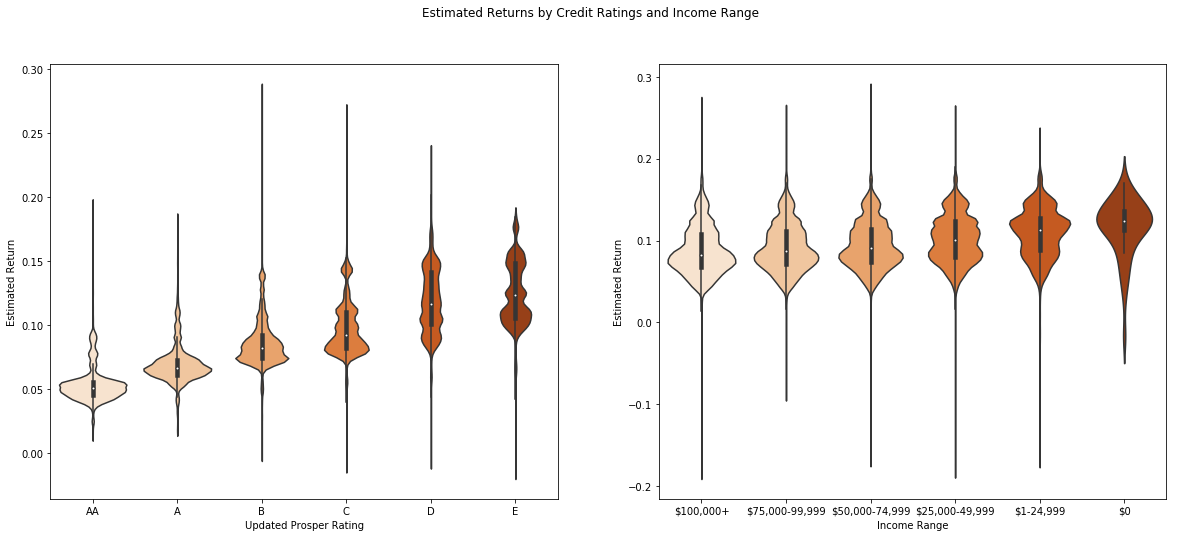

In [17]:
#plot the relation between Estimated Return and Credit Rating, and Estimated Return and Income Range
plt.figure(figsize = [20, 8])

plt.subplot(1, 2, 1)
sns.violinplot(data=loan_df, x='UpdatedProsperRating', y='EstimatedReturn', palette='Oranges')
plt.ylabel('Estimated Return')
plt.xlabel('Updated Prosper Rating')
plt.xticks(rotation=0);

plt.subplot(1, 2, 2)
sns.violinplot(data=loan_df, x='IncomeRange', y='EstimatedReturn', palette='Oranges')
plt.ylabel('Estimated Return')
plt.xlabel('Income Range')
plt.xticks(rotation=0);

plt.suptitle('Estimated Returns by Credit Ratings and Income Range');

## Relationship between the Credit Rating and the Income Range
Higher income ranges are generally associated with better credit ratings and smaller income ranges proportionally correlate with lower credit ratings. 

In [18]:
# Use group_by() and size() to get the number of each combination of the two variable levels as a pandas Series
ct_counts = loan_df.groupby(['UpdatedProsperRating', 'IncomeRange']).size()

In [19]:
# Use Series.reset_index() to convert a series into a dataframe object
ct_counts = ct_counts.reset_index(name='count')

In [20]:
# Use DataFrame.pivot() to rearrange the data
ct_counts = ct_counts.pivot(index ='IncomeRange', columns = 'UpdatedProsperRating', values = 'count')

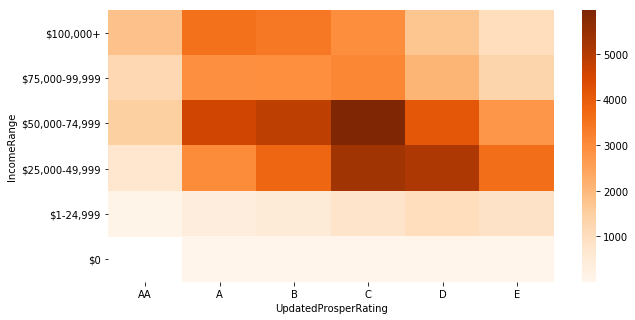

In [21]:
#plot the relation between Income Range and Credit Rating
plt.figure(figsize = [10, 5])
sns.heatmap(ct_counts, cmap = "Oranges");

## Effect of Loan Term on the the Distribution of Income Ranges and Credit Ratings in relation to Estimated Returns

The loan term does not have significant impact on the distribution of Income Ranges and Credit Ratings in relation to Estimated Returns.

The general distribution seems to indicate that longer loan terms correlate with higher returns and longer loan terms might be deemed riskier loans. The trend is only disrupted for the credit rating E where a shorter loan term of 36 months has slightly more estimated returns than the loan term of 12 months.

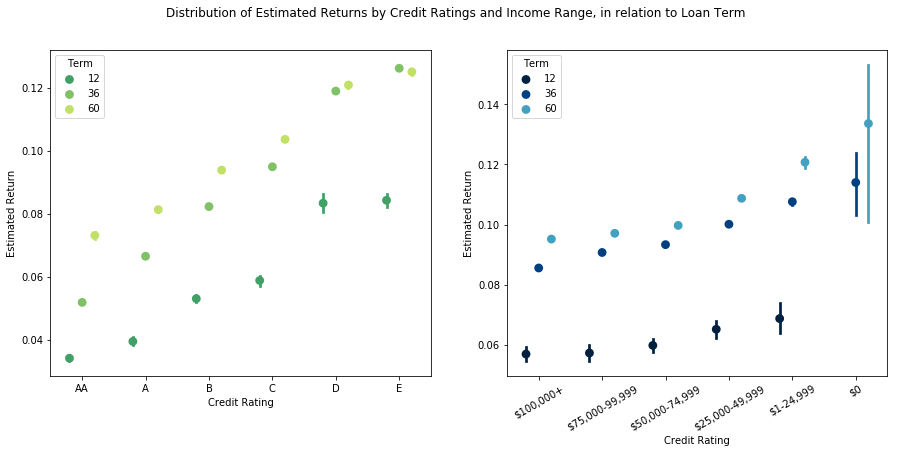

In [22]:
#plot the relation between Estimated Return, Credit Rating and Loan Term
plt.figure(figsize = [15, 6])

plt.subplot(1, 2, 1)
sns.pointplot(data = loan_df, x = 'UpdatedProsperRating', y = 'EstimatedReturn', hue = 'Term',
           palette = 'summer', linestyles = '', dodge = 0.4)
plt.xticks(rotation=0);
plt.ylabel('Estimated Return')
plt.xlabel('Credit Rating')

plt.subplot(1, 2, 2)
sns.pointplot(data = loan_df, x = 'IncomeRange', y = 'EstimatedReturn', hue = 'Term',
           palette = 'ocean', linestyles = '', dodge = 0.4)
plt.xticks(rotation=30);
plt.ylabel('Estimated Return')
plt.xlabel('Credit Rating')

plt.suptitle('Distribution of Estimated Returns by Credit Ratings and Income Range, in relation to Loan Term');

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 524444 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser: not 